In [94]:
import numpy as np
import pandas as pd
import pickle
import glob
from tsfresh.utilities.dataframe_functions import impute
import matplotlib.pyplot as plt

In [57]:
output_list = glob.glob('outputs/*')
output_list.sort()
output_list = output_list [1:]
output_list

['outputs/output__10__3__.pkl',
 'outputs/output__10__4__.pkl',
 'outputs/output__10__6__.pkl',
 'outputs/output__160__2__.pkl',
 'outputs/output__20__2__.pkl',
 'outputs/output__20__4__.pkl',
 'outputs/output__20__6__.pkl',
 'outputs/output__30__2__.pkl',
 'outputs/output__30__4__.pkl',
 'outputs/output__30__6__.pkl',
 'outputs/output__40__2__.pkl',
 'outputs/output__40__4__.pkl',
 'outputs/output__40__6__.pkl',
 'outputs/output__80__2__.pkl',
 'outputs/output__80__4__.pkl',
 'outputs/output__80__6__.pkl']

In [100]:
data = []

for file in output_list:

    aux = []

    granularity = file.split('__')[-2]

    output_dict = pickle.load(open(file, "rb"))

    if not (output_dict['n_time_series'] == 160 or np.isnan(output_dict['n_time_series']) == True):

        columns = list(output_dict.keys())

        for values in output_dict:

            value = float(output_dict[values])

            if np.isnan(value):

                aux.append(0)

            else:
                aux.append(value)

        aux.append(int(granularity))

        columns.append('granularity')

    data.append(aux)

df = pd.DataFrame(data, columns=columns)

df = df.drop(3, axis=0)


In [101]:
df

,n_time_series,mean_enlapsed_time,std_enlapsed_time,mean_n_good_groups,std_n_good_groups,mean_n_bad_groups,std_n_bad_groups,good_mean,good_std,bad_mean,bad_std,granularity
0,10.0,14.948573,0.000000,0.242424,1.371359,9.757576,1.371359,100.000000,0.000000,100.000000,0.000000,3.0
1,10.0,10.758358,0.469797,7.848485,0.434930,1.939394,0.238606,99.613900,4.376751,100.000000,0.000000,4.0
2,10.0,10.748352,0.198030,7.939394,0.238606,1.939394,0.238606,99.618321,4.351815,100.000000,0.000000,6.0
4,20.0,26.796877,1.762568,1.272727,0.445362,0.000000,0.000000,80.047763,6.271772,0.000000,0.000000,2.0
5,20.0,38.439444,2.444754,15.515152,0.701566,3.575758,0.494227,98.909505,7.143514,99.717514,3.055552,4.0
6,20.0,41.169315,1.867653,15.636364,0.642824,3.878788,0.326374,99.741602,3.431686,100.000000,0.000000,6.0
7,30.0,52.679177,4.017218,1.060606,0.238606,0.000000,0.000000,80.052129,3.249989,0.000000,0.000000,2.0
8,30.0,90.467133,6.597582,22.818182,1.140296,5.484848,0.609083,99.203187,5.754908,99.631676,3.484510,4.0
9,30.0,89.805775,6.853971,23.121212,0.977243,5.727273,0.508874,99.574050,4.255888,99.823633,2.418220,6.0
10,40.0,92.392784,7.328560,1.030303,0.171420,0.000000,0.000000,79.775910,2.477686,0.000000,0.000000,2.0


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

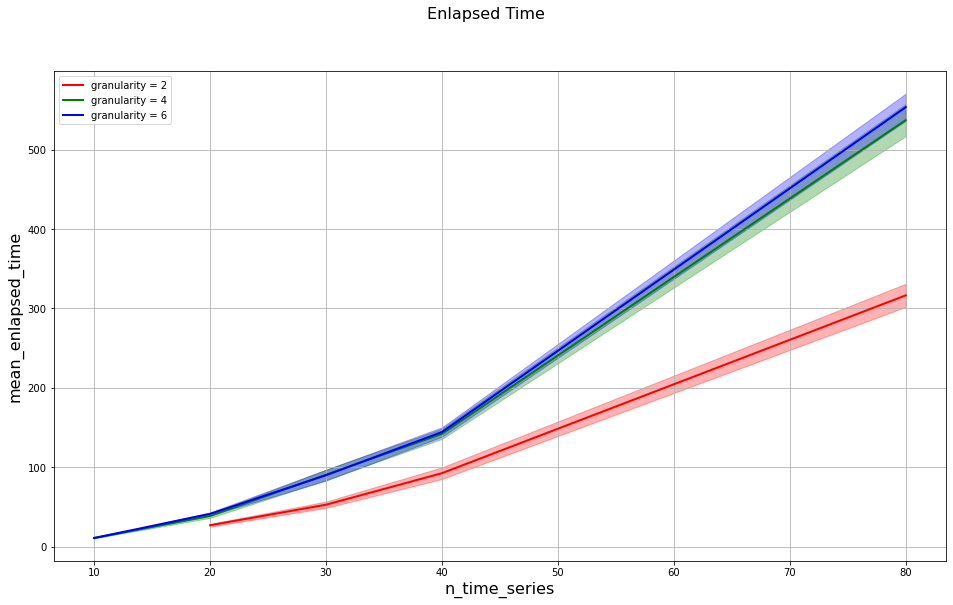

In [120]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Enlapsed Time', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2]

gra_4 = [df[::]['granularity'] == 4]

gra_6 = [df[::]['granularity'] == 6]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('mean_enlapsed_time', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['mean_enlapsed_time'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['mean_enlapsed_time'].values[gra_2] - df[::]['std_enlapsed_time'].values[gra_2],
                df[::]['mean_enlapsed_time'].values[gra_2] + df[::]['std_enlapsed_time'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['mean_enlapsed_time'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['mean_enlapsed_time'].values[gra_4] - df[::]['std_enlapsed_time'].values[gra_4],
                df[::]['mean_enlapsed_time'].values[gra_4] + df[::]['std_enlapsed_time'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['mean_enlapsed_time'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['mean_enlapsed_time'].values[gra_6] - df[::]['std_enlapsed_time'].values[gra_6],
                df[::]['mean_enlapsed_time'].values[gra_6] + df[::]['std_enlapsed_time'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('mean_enlapsed_time.png', bbox_inches='tight')


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

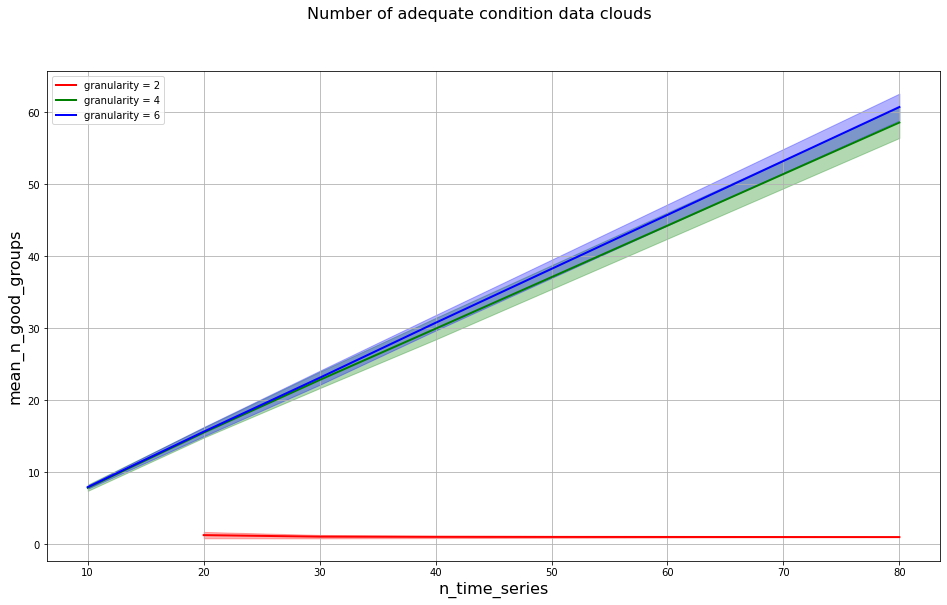

In [119]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Number of adequate condition data clouds', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2]

gra_4 = [df[::]['granularity'] == 4]

gra_6 = [df[::]['granularity'] == 6]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('mean_n_good_groups', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['mean_n_good_groups'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['mean_n_good_groups'].values[gra_2] - df[::]['std_n_good_groups'].values[gra_2],
                df[::]['mean_n_good_groups'].values[gra_2] + df[::]['std_n_good_groups'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['mean_n_good_groups'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['mean_n_good_groups'].values[gra_4] - df[::]['std_n_good_groups'].values[gra_4],
                df[::]['mean_n_good_groups'].values[gra_4] + df[::]['std_n_good_groups'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['mean_n_good_groups'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['mean_n_good_groups'].values[gra_6] - df[::]['std_n_good_groups'].values[gra_6],
                df[::]['mean_n_good_groups'].values[gra_6] + df[::]['std_n_good_groups'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('mean_n_good_groups.png', bbox_inches='tight')


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

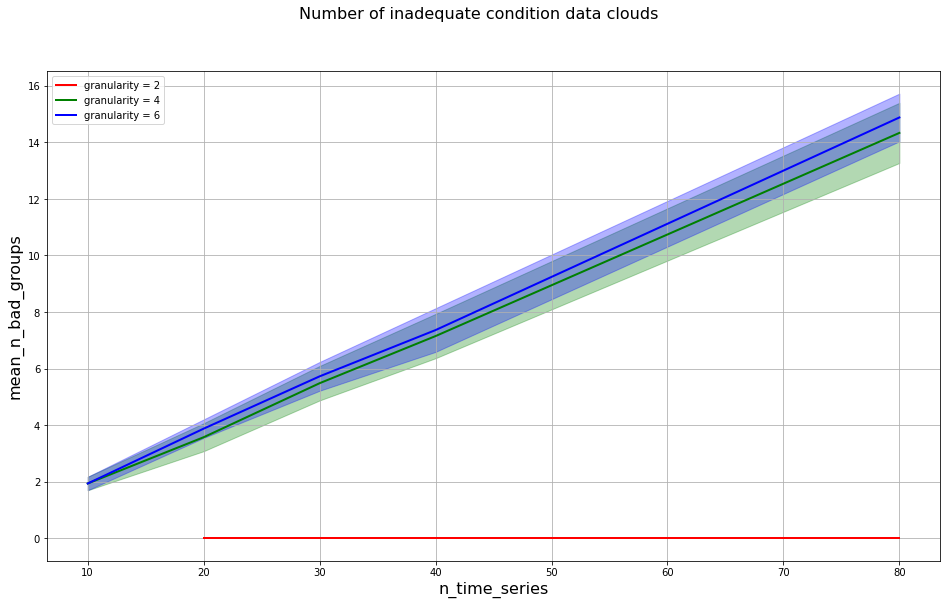

In [118]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Number of inadequate condition data clouds', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2]

gra_4 = [df[::]['granularity'] == 4]

gra_6 = [df[::]['granularity'] == 6]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('mean_n_bad_groups', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['mean_n_bad_groups'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['mean_n_bad_groups'].values[gra_2] - df[::]['std_n_bad_groups'].values[gra_2],
                df[::]['mean_n_bad_groups'].values[gra_2] + df[::]['std_n_bad_groups'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['mean_n_bad_groups'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['mean_n_bad_groups'].values[gra_4] - df[::]['std_n_bad_groups'].values[gra_4],
                df[::]['mean_n_bad_groups'].values[gra_4] + df[::]['std_n_bad_groups'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['mean_n_bad_groups'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['mean_n_bad_groups'].values[gra_6] - df[::]['std_n_bad_groups'].values[gra_6],
                df[::]['mean_n_bad_groups'].values[gra_6] + df[::]['std_n_bad_groups'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('mean_n_bad_groups.png', bbox_inches='tight')


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

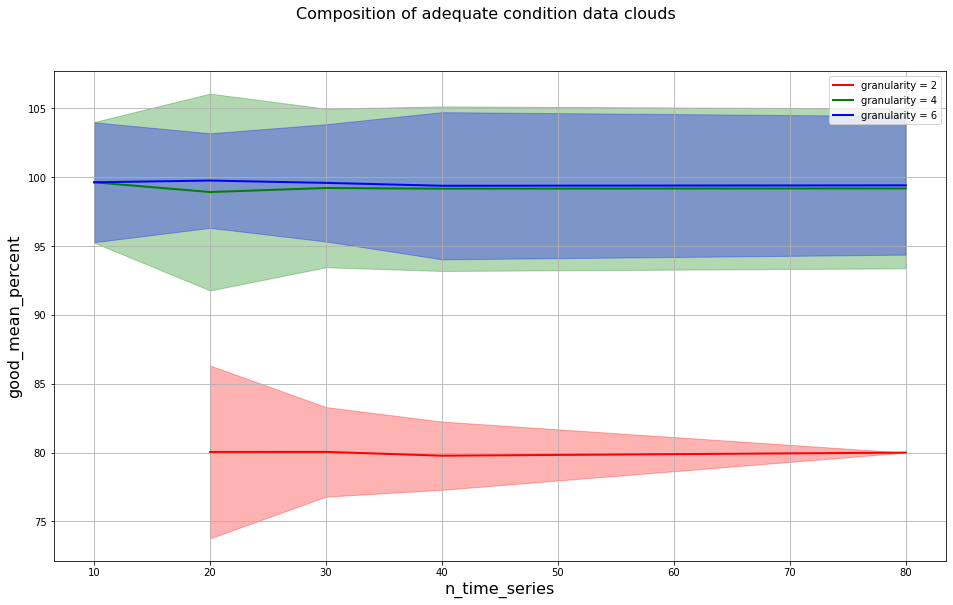

In [117]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Composition of adequate condition data clouds', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2]

gra_4 = [df[::]['granularity'] == 4]

gra_6 = [df[::]['granularity'] == 6]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('good_mean_percent', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['good_mean'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['good_mean'].values[gra_2] - df[::]['good_std'].values[gra_2],
                df[::]['good_mean'].values[gra_2] + df[::]['good_std'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['good_mean'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['good_mean'].values[gra_4] - df[::]['good_std'].values[gra_4],
                df[::]['good_mean'].values[gra_4] + df[::]['good_std'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['good_mean'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['good_mean'].values[gra_6] - df[::]['good_std'].values[gra_6],
                df[::]['good_mean'].values[gra_6] + df[::]['good_std'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('good_mean_percent.png', bbox_inches='tight')


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

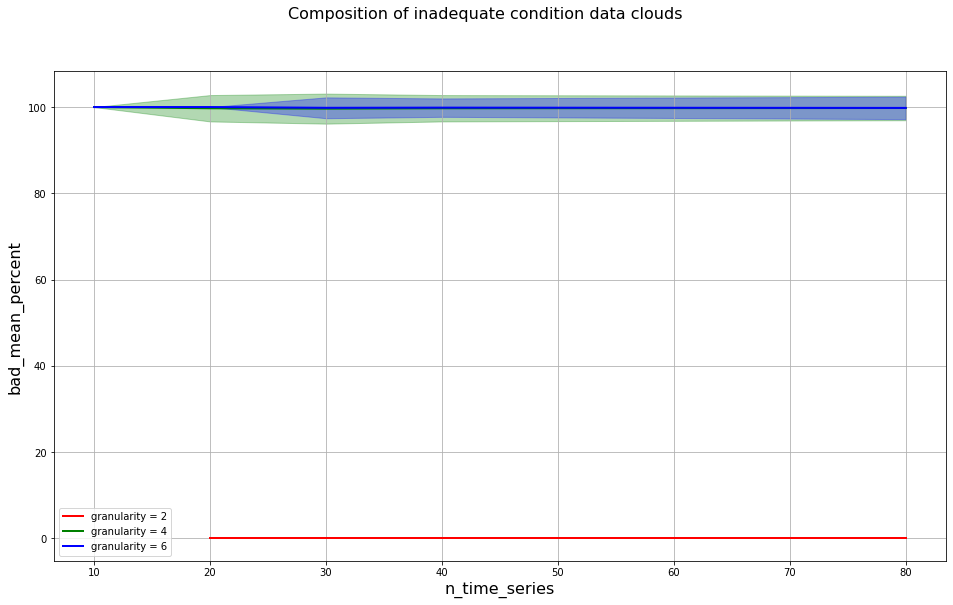

In [116]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Composition of inadequate condition data clouds', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2]

gra_4 = [df[::]['granularity'] == 4]

gra_6 = [df[::]['granularity'] == 6]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('bad_mean_percent', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['bad_mean'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['bad_mean'].values[gra_2] - df[::]['bad_std'].values[gra_2],
                df[::]['bad_mean'].values[gra_2] + df[::]['bad_std'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['bad_mean'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['bad_mean'].values[gra_4] - df[::]['bad_std'].values[gra_4],
                df[::]['bad_mean'].values[gra_4] + df[::]['bad_std'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['bad_mean'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['bad_mean'].values[gra_6] - df[::]['bad_std'].values[gra_6],
                df[::]['bad_mean'].values[gra_6] + df[::]['bad_std'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('bad_mean_percent.png', bbox_inches='tight')
